In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import norm

In [3]:
# Load the dataset
df = pd.read_excel("C:/Users/SAPTARSHI/Downloads/red_light_violation.xlsx")

In [4]:
df.head()

,Timestamp,Name,Email,Age Group,Gender,Occupation,Approximate monthly income of the person who violates traffic signals\n,Education level\n,Driving Experience,How often do your friends describe you as argumentative?,...,What are the main reasons that make you more likely to cross during a red light?.1,Do you believe that adding countdown timers effect on red light violation?\n,"What strategies or policies might make you less likely to run a red light , and which measures do you think would most effectively reduce red light running?",When do you believe red light violations are most common?,Which type of vehicle is more likely to violate red light?,Which type of intersections do you believe is most prone to red light violations?,What type of public awareness campaign would be most likely to influence your driving behaviour regarding red light running ?,When do you believe red light violations are most common?.1,Which type of vehicle is more likely to violate red light?.1,Which type of intersections do you believe is most prone to red light violations?.1
0,10/22/2024 19:57:38,Sourav Dutta,NaN,19 - 29,Male,Employed,20k -50k,Post -Graduation and above,More than 5 years,Moderate,...,NaN,NaN,NaN,NaN,NaN,NaN,"Ads on TV,radio,or online",Weekdays during peak traffic hours,Auto Rickshaw,Circular intersections
1,10/22/2024 21:24:05,Saptarshi Khan,NaN,19 - 29,Male,Student,Less than 20 k,Graduation,0 -1 year,Moderate,...,To save time or avoid long waits,"Yes ,but only slightly",More police enforcement,Weekdays during peak traffic hours,Auto rickshaw,All of the above,NaN,NaN,NaN,NaN
2,10/22/2024 22:01:21,Saptarshi Khan,NaN,19 - 29,Male,Student,Less than 20 k,Graduation,NaN,Moderate,...,To save time or avoid long waits,"Yes ,but only slightly",More police enforcement,Weekdays during peak traffic hours,Auto rickshaw,All of the above,NaN,NaN,NaN,NaN
3,10/23/2024 0:17:38,Abhijeet Murmu,abhi.phena@gmail.com,19 - 29,Male,Student,20k -50k,Graduation,More than 5 years,Moderate,...,NaN,NaN,NaN,Weekdays during non -peak or late night hours,Motorcycles,Circular intersections,NaN,NaN,NaN,NaN
4,10/23/2024 0:18:49,Pavan ALAPATI,pavanalapati9@gmail.com,19 - 29,Male,Student,50k - 1 lakh,Graduation,1- 5 years,Moderate,...,To save time or avoid long waits,"Yes,it would help a lot",Better traffic signal timing,Weekdays during peak traffic hours,Motorcycles,All of the above,NaN,NaN,NaN,NaN


In [5]:
# Drop irrelevant columns
df_cleaned = df.drop(columns=["Timestamp", "Name", "Email"], errors='ignore')


In [6]:
# Encode target variable (Yes -> 1, No -> 0)
df_cleaned["RedLightViolation"] = df_cleaned["Have you ever crossed the street during a red light?"].map({"Yes": 1, "No": 0})

In [7]:
# Drop original target column
df_cleaned = df_cleaned.drop(columns=["Have you ever crossed the street during a red light?"], errors='ignore')


In [46]:
# Define column groups
demographic_cols = ["Age Group", "Gender", "Occupation", "Approximate monthly income of the person who violates traffic signals", "Education level"]
psychological_cols = ["How often do your friends describe you as argumentative?", "Do you openly express disagreement with your friends?", "Do you find yourself getting into arguments when people disagree with you?", "Do you get into physical fights more frequently than the average person?", "Have you ever been so angry that you broke something?"]
driving_experience_cols = ["Driving Experience", "How many hours a day do you usually drive?"]
traffic_external_cols = ["In which areas do you think red light violations are more of a problem?", "What are the main reasons that make you more likely to cross during a red light?", "Do you believe that adding countdown timers to traffic lights would reduce red light violations?", "What strategies or policies might make you less likely to run a red light?"]
perception_cols = ["How do you react when you see someone running a red light?", "When do you believe red light violations are most common?", "Which type of vehicle is more likely to violate red light?", "Which type of intersections do you believe is most prone to red light violations?", "What type of public awareness campaign would be most likely to influence your driving behaviour regarding red light running?"]

In [47]:
# Function to preprocess data
def preprocess_data(selected_cols):
    existing_cols = [col for col in selected_cols if col in df_cleaned.columns]
    X_factor = df_cleaned[existing_cols].copy()
    X_factor_encoded = pd.get_dummies(X_factor, drop_first=True)
    imputer = SimpleImputer(strategy="most_frequent")
    X_factor_imputed = pd.DataFrame(imputer.fit_transform(X_factor_encoded), columns=X_factor_encoded.columns)
    return X_factor_imputed

In [48]:
# Function to train Logit Model and plot feature importance as heatmap
def train_logit(feature_group, group_name):
    X = preprocess_data(feature_group)
    y = df_cleaned["RedLightViolation"]
    X = sm.add_constant(X)  # Add intercept
    
    model = sm.Logit(y, X)
    result = model.fit()
    
    print(f"\nLogit Model Summary - {group_name}\n")
    print(result.summary())
    
    # Extract coefficients
    coef = result.params.iloc[1:]  # Skip intercept
    coef_df = coef.to_frame()
    coef_df.columns = ['Coefficient']
    
    # Plot line graph
    plt.figure(figsize=(10, 6))
    plt.plot(coef_df.index, coef_df['Coefficient'], marker='o', linestyle='-', color='b')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.title(f"Feature Importance - {group_name}")
    plt.grid()
    plt.show()

         Current function value: 0.522506
         Iterations: 35

Logit Model Summary - Demographic Factors

                           Logit Regression Results                           
Dep. Variable:      RedLightViolation   No. Observations:                  800
Model:                          Logit   Df Residuals:                      791
Method:                           MLE   Df Model:                            8
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                 0.06155
Time:                        23:20:23   Log-Likelihood:                -418.00
converged:                      False   LL-Null:                       -445.42
Covariance Type:            nonrobust   LLR p-value:                 4.762e-09
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5089      0.481     -3.135      0.002      -2.452      -

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\SAPTARSHI\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


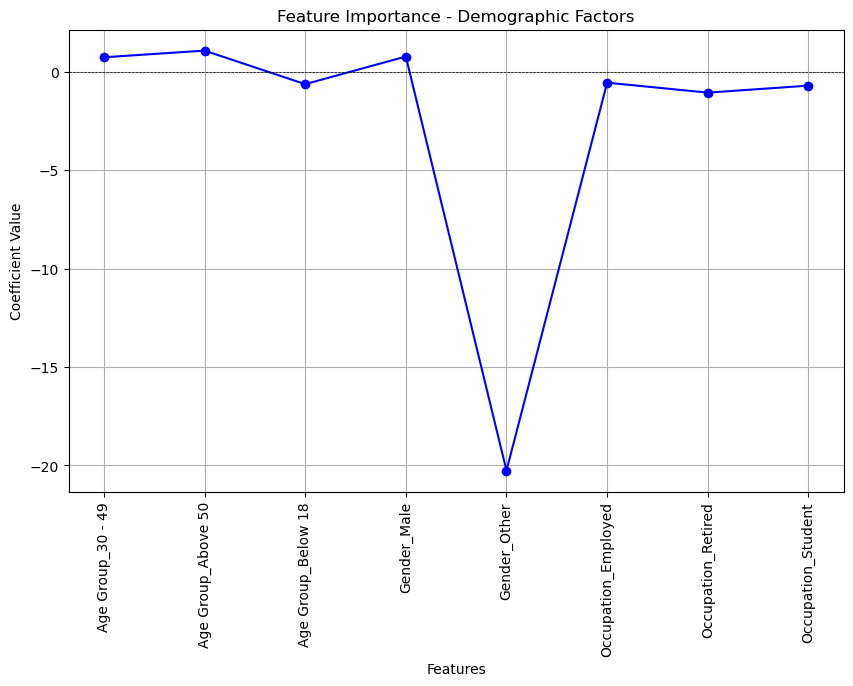

In [49]:
train_logit(demographic_cols, "Demographic Factors")

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Optimization terminated successfully.
         Current function value: 0.485860
         Iterations 7

Logit Model Summary - Psychological Factors

                           Logit Regression Results                           
Dep. Variable:      RedLightViolation   No. Observations:                  800
Model:                          Logit   Df Residuals:                      790
Method:                           MLE   Df Model:                            9
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.1274
Time:                        23:20:53   Log-Likelihood:                -388.69
converged:                       True   LL-Null:                       -445.42
Covariance Type:            nonrobust   LLR p-value:                 2.893e-20
                                                                                           coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

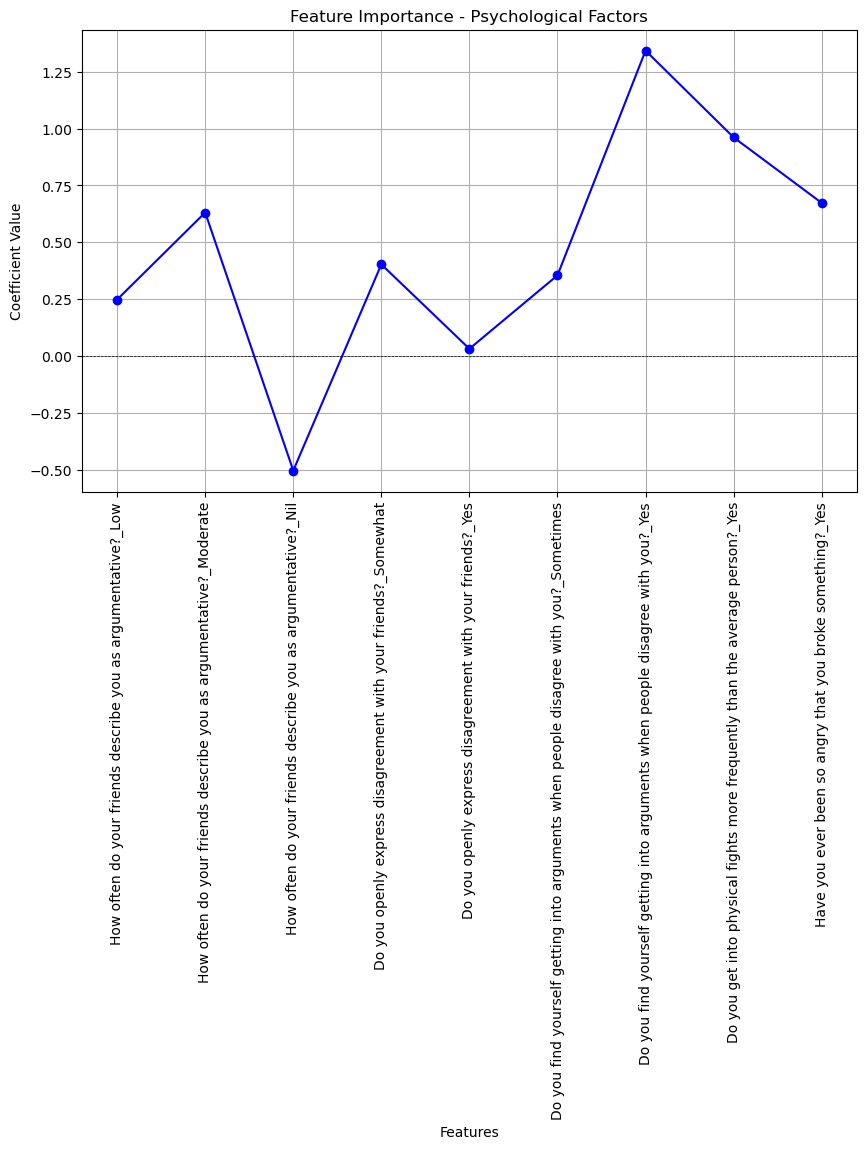

In [50]:
train_logit(psychological_cols, "Psychological Factors")

Optimization terminated successfully.
         Current function value: 0.422615
         Iterations 9

Logit Model Summary - Driving Experience

                           Logit Regression Results                           
Dep. Variable:      RedLightViolation   No. Observations:                  800
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.2410
Time:                        23:21:03   Log-Likelihood:                -338.09
converged:                       True   LL-Null:                       -445.42
Covariance Type:            nonrobust   LLR p-value:                 2.073e-44
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


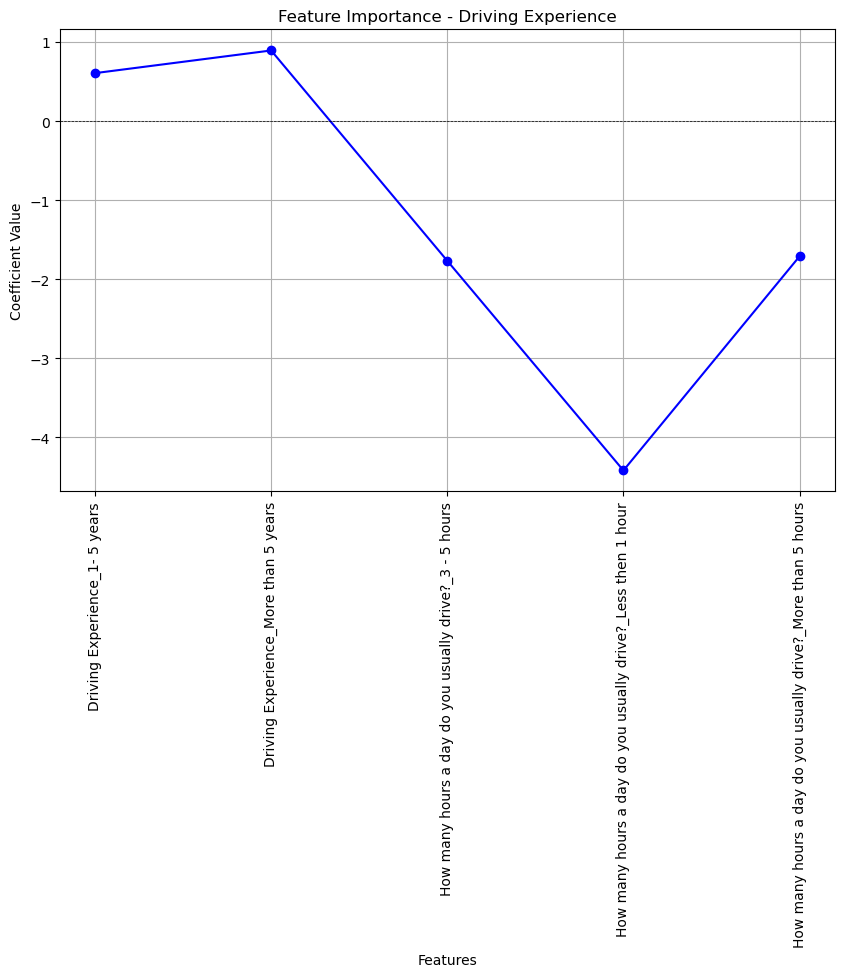

In [51]:
train_logit(driving_experience_cols, "Driving Experience")

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Optimization terminated successfully.
         Current function value: 0.299564
         Iterations 8

Logit Model Summary - Traffic & External Factors

                           Logit Regression Results                           
Dep. Variable:      RedLightViolation   No. Observations:                  800
Model:                          Logit   Df Residuals:                      793
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.4620
Time:                        23:21:18   Log-Likelihood:                -239.65
converged:                       True   LL-Null:                       -445.42
Covariance Type:            nonrobust   LLR p-value:                 9.236e-86
                                                                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------

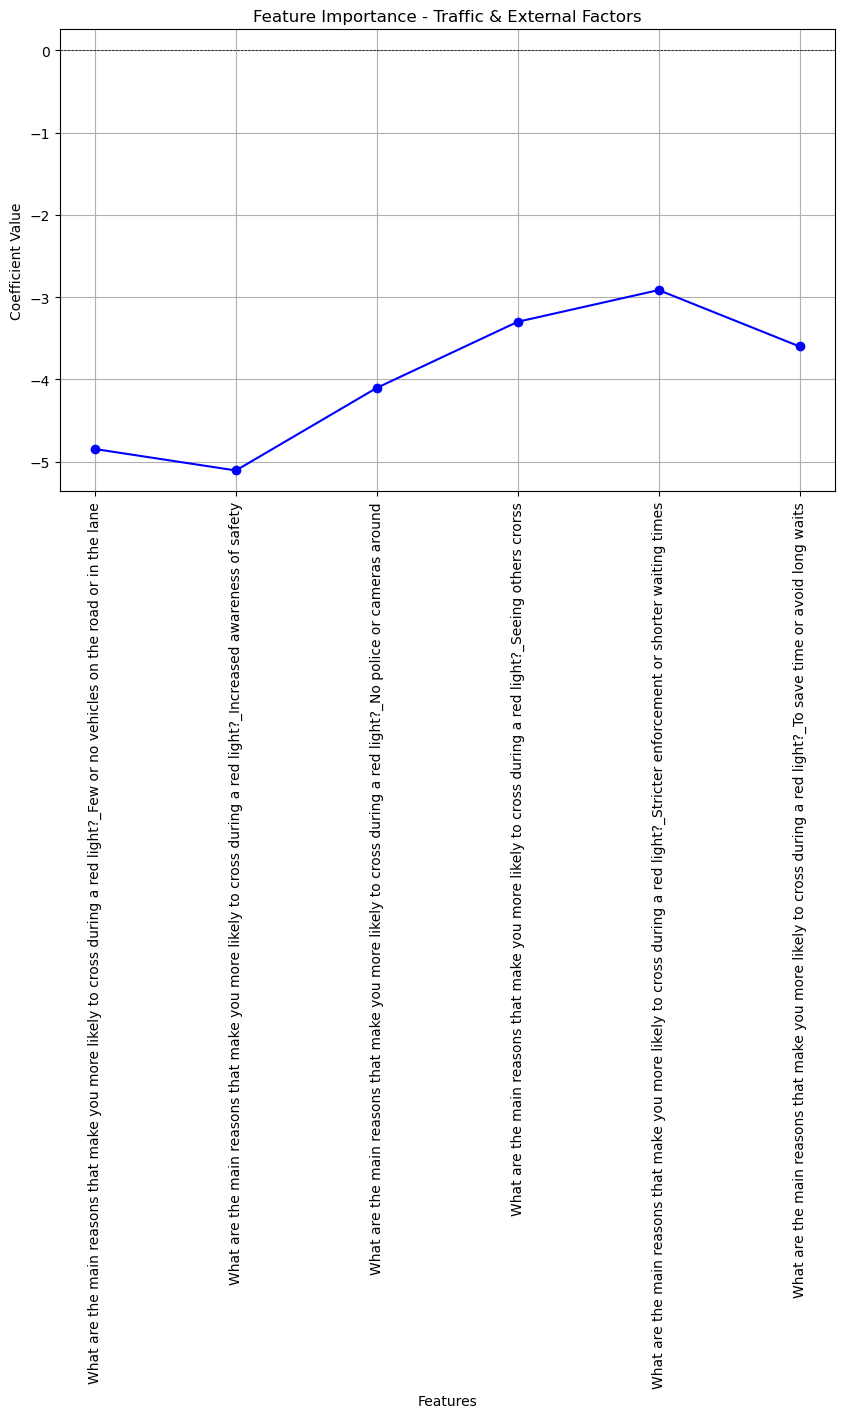

In [52]:
train_logit(traffic_external_cols, "Traffic & External Factors")

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Optimization terminated successfully.
         Current function value: 0.432117
         Iterations 7

Logit Model Summary - Perception Factors

                           Logit Regression Results                           
Dep. Variable:      RedLightViolation   No. Observations:                  800
Model:                          Logit   Df Residuals:                      786
Method:                           MLE   Df Model:                           13
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.2239
Time:                        23:21:26   Log-Likelihood:                -345.69
converged:                       True   LL-Null:                       -445.42
Covariance Type:            nonrobust   LLR p-value:                 1.770e-35
                                                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

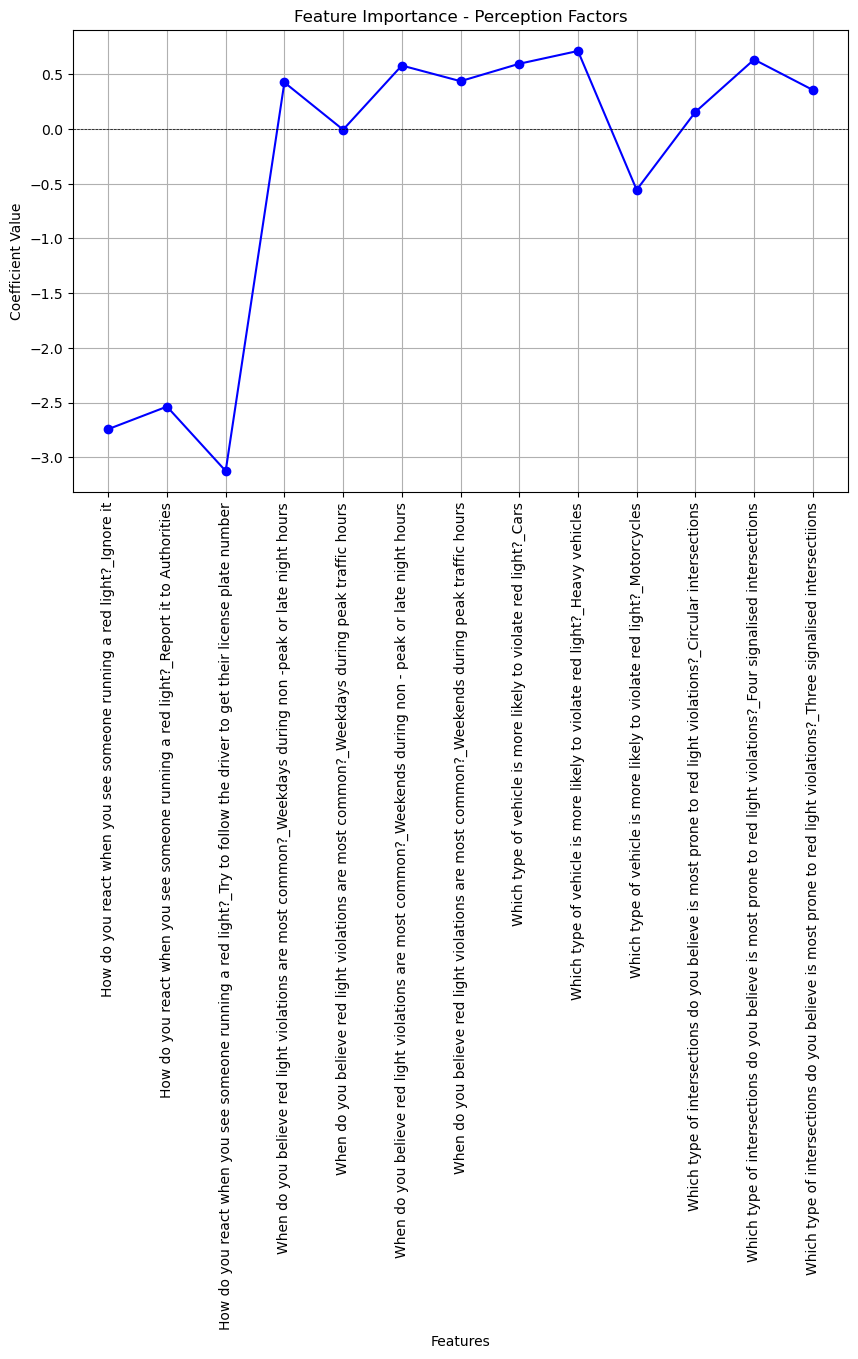

In [53]:
train_logit(perception_cols, "Perception Factors")